In [1]:
import pandas as pd

df = pd.read_csv('/Users/minwoo/Desktop/Ï∑®Ï§Ä/data_engineering_course_materials/missions/W2/21_reviews_score.csv')
df['label'] = df['star'].apply(lambda x: 1 if x == 5.0 else 0)
df = df[['review', 'label']].dropna()
df.head()

review  label
0  Î∞îÎ°ú ÌååÎç∞ÌïòÍ≥† Ï∞çÏùÄ ÏÇ¨ÏßÑ 15ÏãúÍ∞Ñ ÌõÑ ÏÇ¨ÏßÑÏ≤´ ÌååÎç∞Î•º Ïù¥Í±∏Î°ú ÏçºÎäîÎç∞ Îã§Î•∏ Í±∞ ÎèÑÏ†Ñ Ïïà...      1
1  ÏöîÍ±¥ Í∑∏ÎÉ• Î¨¥ÎÇúÎ¨¥ÎÇú ÏõêÎûòÎäî Î≥ÑÎ£®ÏòÄÎäîÎç∞ Ïó¨Î¶ÑÏù¥Îùº Í∑∏Îü∞ÏßÄ ÏµúÍ≥†Ïùò ÌååÎç∞ÏûÑ ÏõåÌÑ∞Î£®ÌîÑÎèÑ ÏïÑÎãå...      1
2        Ïª§Î≤ÑÎ†•ÏùÄ ÏûàÏúºÎ©¥ÏÑúÎèÑ Î∞ÄÏ∞©Î†•ÏûàÍ≤å Î∞úÎ¶¨ÎäîÍ±∞ Í∞ôÏïÑÏöî ÏÉâÎèÑ Ïù¥ÎªêÏÑú ÎßàÏùåÏóê Îì§Ïñ¥Ïöî !!      1
3  Î™áÎÖÑÏß∏ ÏÇ¨Ïö©Ï§ëÏù∏ Ï†úÌíàÏù¥ÏóêÏöî„ÖéÌååÏö¥Îç∞Ïù¥ÏÖò Ï§ëÏóê ÎÅàÏ†ÅÏù¥ÏßÄÏïäÍ≥† Î∞úÏÉâÎèÑ Ï¢ãÏïÑÏöîÌïòÎÇò Îçî ÏüÅÏó¨ ...      1
4  1Î∞îÎ•¥Í∏∞Ï†Ñ 2Î≤à Î∞îÎ•∏ ÌõÑÏ°∞Í∏àÎßå Î∞úÎûêÎäîÎç∞ÎèÑ Î∞ùÏïÑÏßÑÍ≤å Ìôï ÎäêÍª¥Ï†∏ÏöîÍ∑ºÎç∞ Ï≤òÏùåÏóê Î∞úÎûêÏùÑÎïê ...      0

In [2]:
df["label"].value_counts()

label
1    868
0    132
Name: count, dtype: int64

In [3]:
from transformers import AutoTokenizer, AutoModel
import torch

tokenizer = AutoTokenizer.from_pretrained("beomi/KcELECTRA-base-v2022")
model = AutoModel.from_pretrained("beomi/KcELECTRA-base-v2022", output_attentions=True)
model.eval()

/opt/anaconda3/envs/W2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ElectraModel(
  (embeddings): ElectraEmbeddings(
    (word_embeddings): Embedding(54343, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): ElectraEncoder(
    (layer): ModuleList(
      (0-11): 12 x ElectraLayer(
        (attention): ElectraAttention(
          (self): ElectraSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): ElectraSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0

In [4]:
import re
import emoji
from soynlp.normalizer import repeat_normalize

emojis = ''.join(emoji.EMOJI_DATA)
pattern = re.compile(f'[^ .,?!/@$%~ÔºÖ¬∑‚àº()\x00-\x7F„Ñ±-„Ö£Í∞Ä-Ìû£{emojis}]+')
url_pattern = re.compile(
    r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)')

import re
import emoji
from soynlp.normalizer import repeat_normalize

pattern = re.compile(f'[^ .,?!/@$%~ÔºÖ¬∑‚àº()\x00-\x7F„Ñ±-„Ö£Í∞Ä-Ìû£]+')
url_pattern = re.compile(
    r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)')

def clean(x): 
    x = pattern.sub(' ', x)
    x = emoji.replace_emoji(x, replace='') #emoji ÏÇ≠Ï†ú
    x = url_pattern.sub('', x)
    x = x.strip()
    x = repeat_normalize(x, num_repeats=2)
    return x

In [ ]:
from kiwipiepy import Kiwi
import re

kiwi = Kiwi(typos='basic_with_continual')

def is_valid_token(form):
    return bool(re.fullmatch(r'[Í∞Ä-Ìû£]+', form))

def extract_smart_nouns(text, min_len=2):
    result = []
    tokens = kiwi.tokenize(text, split_complex=True, normalize_coda=False)

    temp = ""
    temp_count = 0
    last_tag = None
    last_end = 0

    for token in tokens:
        form, tag = token.form, token.tag
        start, length = token.start, token.len

        is_space_between = start > last_end and text[last_end:start].isspace()
        last_end = start + length

        # ÌïúÍ∏ÄÎßå ÌïÑÌÑ∞ÎßÅ
        if not re.fullmatch(r"[Í∞Ä-Ìû£]+", form):
            continue

        # Í≥µÎ∞±Ïù¥ ÏûàÍ±∞ÎÇò ÎÑàÎ¨¥ ÎßéÏù¥ Î∂ôÏóàÏúºÎ©¥ ÌòÑÏû¨ÍπåÏßÄÎäî Ï¢ÖÎ£å
        if is_space_between or temp_count >= 2:
            if len(temp) >= min_len:
                result.append(temp)
            temp = ""
            temp_count = 0
            last_tag = None

        # NNGÎäî ÏãúÏûë ÎòêÎäî Ïó∞Í≤∞ ÎåÄÏÉÅ
        if tag == 'NNG':
            if temp_count == 0:
                temp = form
                temp_count = 1
            elif last_tag == 'NNG':
                temp += form
                temp_count += 1
            else:
                if len(temp) >= min_len:
                    result.append(temp)
                temp = form
                temp_count = 1
            last_tag = tag

        # Ï†ëÎØ∏ÏÇ¨ XSNÎäî NNG Îã§ÏùåÏùº ÎïåÎßå Î∂ôÏûÑ
        elif tag == 'XSN':
            if last_tag == 'NNG' and temp_count == 1:
                temp += form
                temp_count += 1
                last_tag = tag
            else:
                if len(temp) >= min_len:
                    result.append(temp)
                temp = ""
                temp_count = 0
                last_tag = None

        # Í∑∏ Ïô∏Îäî Î™®Îëê Ï¢ÖÎ£å
        else:
            if len(temp) >= min_len:
                result.append(temp)
            temp = ""
            temp_count = 0
            last_tag = None

    if len(temp) >= min_len:
        result.append(temp)

    return result

In [20]:
samples = [
    "ÎßõÎèÑÎ¶¨",
    "ÏßÄÏÜçÎ†•",
    "Îã§ÌÅ¨ÎãùÏù¥",
    "Îã¨ÌåΩÏù¥",
    "ÌïúÎã¨ ÎèôÏïà ÎßåÏ°±ÌïòÎ©∞ ÏÇ¨Ïö©ÌñàÏäµÎãàÎã§",
    "Ï†ú Ïù∏ÏÉùÌååÎç∞...ÌïôÏÉùÏãúÏ†àÎ∂ÄÌÑ∞ Íæ∏Ï§ÄÌûàÏÇ¨Ïö©ÌñàÎü¨Ïöî Ï¢ãÏäµÎãàÎåú",
    "Í∞†Ï∞®ÎÇòÏöî ÏûòÏì∞Í≥†ÏûáÏñ¥Îá® Ìù°ÏàòÎ†•ÎèÑ ÎÇòÏÅòÏßÄÏïäÍ≥† Ïª¨Îü¨Í∞êÎèÑ ÏòàÎªêÏÑú Î¨¥ÎÑàÏßêÎèÑ ÏòàÏÅòÍ≥† Ïûò ÏÇ¨Ïö©Ï§ëÏù¥ÏóêÏö©"
]

for sent in samples:
    print(f"üìù ÏûÖÎ†• Î¨∏Ïû•: {sent}")
    print(f"‚û°Ô∏è Ï∂îÏ∂ú Î™ÖÏÇ¨: {extract_smart_nouns(sent)}\n")

üìù ÏûÖÎ†• Î¨∏Ïû•: ÎßõÎèÑÎ¶¨
‚û°Ô∏è Ï∂îÏ∂ú Î™ÖÏÇ¨: ['ÎßõÎèÑÎ¶¨']

üìù ÏûÖÎ†• Î¨∏Ïû•: ÏßÄÏÜçÎ†•
‚û°Ô∏è Ï∂îÏ∂ú Î™ÖÏÇ¨: ['ÏßÄÏÜçÎ†•']

üìù ÏûÖÎ†• Î¨∏Ïû•: Îã§ÌÅ¨ÎãùÏù¥
‚û°Ô∏è Ï∂îÏ∂ú Î™ÖÏÇ¨: []

üìù ÏûÖÎ†• Î¨∏Ïû•: Îã¨ÌåΩÏù¥
‚û°Ô∏è Ï∂îÏ∂ú Î™ÖÏÇ¨: ['Îã¨ÌåΩÏù¥']

üìù ÏûÖÎ†• Î¨∏Ïû•: ÌïúÎã¨ ÎèôÏïà ÎßåÏ°±ÌïòÎ©∞ ÏÇ¨Ïö©ÌñàÏäµÎãàÎã§
‚û°Ô∏è Ï∂îÏ∂ú Î™ÖÏÇ¨: ['ÎèôÏïà', 'ÎßåÏ°±', 'ÏÇ¨Ïö©']

üìù ÏûÖÎ†• Î¨∏Ïû•: Ï†ú Ïù∏ÏÉùÌååÎç∞...ÌïôÏÉùÏãúÏ†àÎ∂ÄÌÑ∞ Íæ∏Ï§ÄÌûàÏÇ¨Ïö©ÌñàÎü¨Ïöî Ï¢ãÏäµÎãàÎåú
‚û°Ô∏è Ï∂îÏ∂ú Î™ÖÏÇ¨: ['Ïù∏ÏÉù', 'ÌïôÏÉùÏãúÏ†à', 'Íæ∏Ï§ÄÌûàÏÇ¨Ïö©ÌñàÎü¨Ïöî', 'Ï¢ãÏäµÎãàÎåú']

üìù ÏûÖÎ†• Î¨∏Ïû•: Í∞†Ï∞®ÎÇòÏöî ÏûòÏì∞Í≥†ÏûáÏñ¥Îá® Ìù°ÏàòÎ†•ÎèÑ ÎÇòÏÅòÏßÄÏïäÍ≥† Ïª¨Îü¨Í∞êÎèÑ ÏòàÎªêÏÑú Î¨¥ÎÑàÏßêÎèÑ ÏòàÏÅòÍ≥† Ïûò ÏÇ¨Ïö©Ï§ëÏù¥ÏóêÏö©
‚û°Ô∏è Ï∂îÏ∂ú Î™ÖÏÇ¨: ['Ìù°ÏàòÎ†•', 'Ïª¨Îü¨Í∞ê', 'ÏÇ¨Ïö©']



In [18]:
kiwi.tokenize("Íæ∏Ï§ÄÌûàÏÇ¨Ïö©ÌñàÎü¨Ïöî")

[Token(form='Íæ∏Ï§ÄÌûà', tag='MAG', start=0, len=3),
 Token(form='ÏÇ¨Ïö©', tag='NNG', start=3, len=2),
 Token(form='Ìïò', tag='XSV', start=5, len=1),
 Token(form='Ïóà', tag='EP', start=5, len=1),
 Token(form='Îü¨Ïöî', tag='EF', start=6, len=2)]

In [106]:
def extract_top_attention_words(text, tokenizer, model, noun_candidates, top_k=3):
    """
    Ï£ºÏñ¥ÏßÑ Î™ÖÏÇ¨ ÌõÑÎ≥¥Îì§ Ï§ë attentionÏù¥ Í∞ÄÏû• ÎÜíÏùÄ top_k Îã®Ïñ¥Î•º Î¶¨Ïä§Ìä∏Î°ú Î∞òÌôò
    """
    tokens = tokenizer(text, return_tensors='pt', truncation=True, max_length=64)
    input_ids = tokens['input_ids']
    
    with torch.no_grad():
        outputs = model(**tokens)
        attentions = outputs.attentions

    last_layer_attention = attentions[-1][0]  # (heads, seq, seq)
    mean_attention = last_layer_attention.mean(dim=0)  # (seq, seq)
    cls_attention = mean_attention[0]

    tokens_decoded = tokenizer.convert_ids_to_tokens(input_ids[0])
    attention_scores = []

    for token, score in zip(tokens_decoded, cls_attention):
        token_clean = token.replace("##", "")
        if token in ["[CLS]", "[SEP]"] or token.startswith("##"):
            continue
        if token_clean in noun_candidates:
            attention_scores.append((token_clean, score.item()))

    # Ï§ëÏöîÎèÑ Ïàú Ï†ïÎ†¨ ÌõÑ top_kÎßå Î∞òÌôò
    if attention_scores:
        attention_scores.sort(key=lambda x: -x[1])
        top_words = [word for word, _ in attention_scores[:top_k]]
        return top_words
    else:
        return []

In [107]:
from collections import defaultdict
from tqdm import tqdm

positive_words = defaultdict(float)
negative_words = defaultdict(float)

top_k = 3 # Ï∂îÏ∂úÌï† ÌÇ§ÏõåÎìú Í∞úÏàò

for _, row in tqdm(df.iterrows(), total=len(df)):
    text = clean(row['review'])
    label = row['label']

    noun_candidates = extract_smart_nouns(text)
    if not noun_candidates:
        continue
    
    keywords = extract_top_attention_words(text, tokenizer, model, noun_candidates, top_k=top_k)
    if not keywords:
        continue

    for kw in keywords:
        if label == 1:
            positive_words[kw] += 1
        else:
            negative_words[kw] += 1

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1000/1000 [00:41<00:00, 24.06it/s]


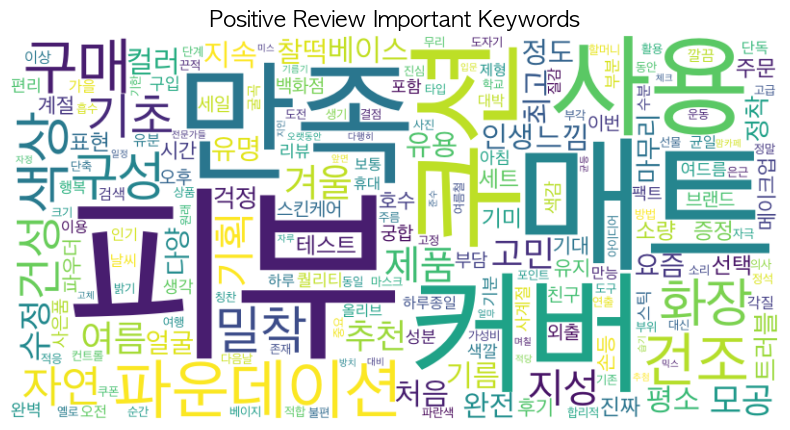

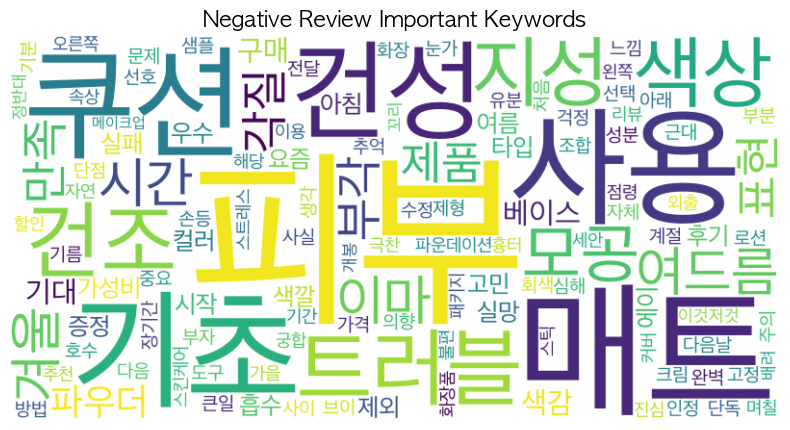

In [108]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def draw_wordcloud(freq_dict, title):
    wc = WordCloud(
        font_path='/System/Library/Fonts/AppleSDGothicNeo.ttc',
        background_color='white',
        width=800, height=400
    ).generate_from_frequencies(freq_dict)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

draw_wordcloud(positive_words, "Positive Review Important Keywords")
draw_wordcloud(negative_words, "Negative Review Important Keywords")

In [109]:
def get_top_k_noun_tokens(text, k=3):
    tokens = extract_smart_nouns(text)
    if tokens:
        freq = defaultdict(int)
        for t in tokens:
            freq[t] += 1
        sorted_tokens = sorted(freq.items(), key=lambda x: -x[1])
        return [word for word, _ in sorted_tokens[:k]]
    return []

# ÌÇ§ÏõåÎìú Ïª¨Îüº ÏÉùÏÑ±
df['keyword'] = df['review'].apply(get_top_k_noun_tokens)

# Í≤∞Í≥º ÌÖåÏù¥Î∏î ÎØ∏Î¶¨Î≥¥Í∏∞
df_keyword_table = df[['review', 'label', 'keyword']]
df_keyword_table.head()


review  label          keyword
0  Î∞îÎ°ú ÌååÎç∞ÌïòÍ≥† Ï∞çÏùÄ ÏÇ¨ÏßÑ 15ÏãúÍ∞Ñ ÌõÑ ÏÇ¨ÏßÑÏ≤´ ÌååÎç∞Î•º Ïù¥Í±∏Î°ú ÏçºÎäîÎç∞ Îã§Î•∏ Í±∞ ÎèÑÏ†Ñ Ïïà...      1     [ÌîºÎ∂Ä, ÌçºÌîÑ, ÌååÎç∞]
1  ÏöîÍ±¥ Í∑∏ÎÉ• Î¨¥ÎÇúÎ¨¥ÎÇú ÏõêÎûòÎäî Î≥ÑÎ£®ÏòÄÎäîÎç∞ Ïó¨Î¶ÑÏù¥Îùº Í∑∏Îü∞ÏßÄ ÏµúÍ≥†Ïùò ÌååÎç∞ÏûÑ ÏõåÌÑ∞Î£®ÌîÑÎèÑ ÏïÑÎãå...      1     [ÎÇúÎ¨¥, ÏõêÎûò, Ïó¨Î¶Ñ]
2        Ïª§Î≤ÑÎ†•ÏùÄ ÏûàÏúºÎ©¥ÏÑúÎèÑ Î∞ÄÏ∞©Î†•ÏûàÍ≤å Î∞úÎ¶¨ÎäîÍ±∞ Í∞ôÏïÑÏöî ÏÉâÎèÑ Ïù¥ÎªêÏÑú ÎßàÏùåÏóê Îì§Ïñ¥Ïöî !!      1   [Ïª§Î≤ÑÎ†•, Î∞ÄÏ∞©Î†•, ÎßàÏùå]
3  Î™áÎÖÑÏß∏ ÏÇ¨Ïö©Ï§ëÏù∏ Ï†úÌíàÏù¥ÏóêÏöî„ÖéÌååÏö¥Îç∞Ïù¥ÏÖò Ï§ëÏóê ÎÅàÏ†ÅÏù¥ÏßÄÏïäÍ≥† Î∞úÏÉâÎèÑ Ï¢ãÏïÑÏöîÌïòÎÇò Îçî ÏüÅÏó¨ ...      1  [ÏÇ¨Ïö©, Ï†úÌíà, ÌååÏö¥Îç∞Ïù¥ÏÖò]
4  1Î∞îÎ•¥Í∏∞Ï†Ñ 2Î≤à Î∞îÎ•∏ ÌõÑÏ°∞Í∏àÎßå Î∞úÎûêÎäîÎç∞ÎèÑ Î∞ùÏïÑÏßÑÍ≤å Ìôï ÎäêÍª¥Ï†∏ÏöîÍ∑ºÎç∞ Ï≤òÏùåÏóê Î∞úÎûêÏùÑÎïê ...      0   [ÌõÑÏ°∞Í∏à, Ï≤òÏùå, ÏßÄÏÜçÎ†•]

In [110]:
output_path = "/Users/minwoo/Desktop/Ï∑®Ï§Ä/data_engineering_course_materials/missions/W2/review_with_keywords.csv"
df_keyword_table.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f"CSV Ï†ÄÏû• ÏôÑÎ£å: {output_path}")

CSV Ï†ÄÏû• ÏôÑÎ£å: /Users/minwoo/Desktop/Ï∑®Ï§Ä/data_engineering_course_materials/missions/W2/review_with_keywords.csv


In [11]:
color_seed_words = [
    "ÏÉâ", "ÏÉâÏÉÅ", "ÏÉâÍπî", "Ïª¨Îü¨", "Îπ®Í∞ï", "ÎÖ∏Îûë", "ÏÉÅÏïÑ", "Î∂âÏùÄ", "ÎàÑÎü∞", "ÎÖ∏ÎûÄ", "Î∂âÏùÄ", "Îã§ÌÅ¨Îãù", "Î∞ùÏùÄ", "Ïñ¥ÎëêÏö¥", "Î∂ÑÌôç", "ÌïëÌÅ¨", "Î≤†Ïù¥ÏßÄ", "ÏòêÎ°úÏö∞", "ÌÜ§",
    "ÌïëÎ≤†", "Îâ¥Ìä∏Îü¥", "Î∂âÏùÄÍ∏∞", "Ïû°Ìã∞", "Ïø®ÌÜ§", "ÏõúÌÜ§", "ÌôçÏ°∞", "ÌôîÏÇ¨", "Î∏åÎùºÏù¥Ìä∏", "ÏÜçÍ¥ë", "ÏùÄÏùÄ", "ÎΩÄÏñó", "ÎÇ¥Ï∂îÎü¥", "ÎÇ¥Ï∏ÑÎü¥", "ÏûêÏó∞", "Îã§Ïñë", "ÎΩÄÏö©",
    ]

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def get_token_embedding(token, tokenizer, model):
    tokens = tokenizer(token, return_tensors='pt')
    with torch.no_grad():
        output = model(**tokens)
    return output.last_hidden_state[0, 1].numpy()  # Ï≤´ Î≤àÏß∏ Ïã§Ï†ú ÌÜ†ÌÅ∞ Î≤°ÌÑ∞ Î∞òÌôò ([CLS]Îäî Ï†úÏô∏)

# 1) ÏÉâ Í∏∞Ï§Ä Î≤°ÌÑ∞ Í≥ÑÏÇ∞
color_embeddings = []
for word in color_seed_words:
    emb = get_token_embedding(word, tokenizer, model)
    color_embeddings.append(emb)
color_matrix = np.stack(color_embeddings)

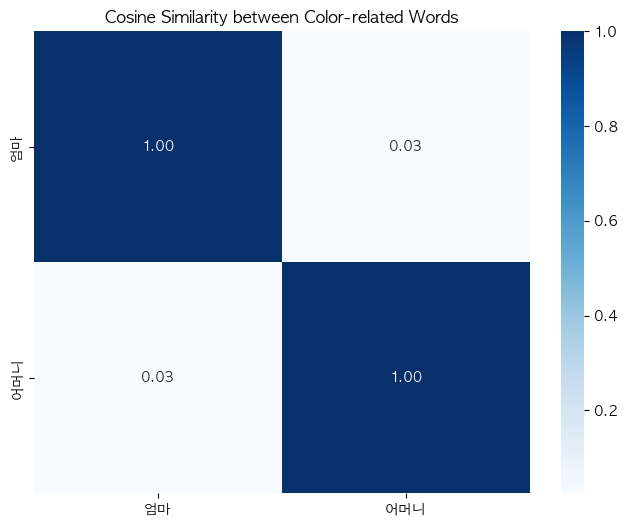

ÏóÑÎßà       Ïñ¥Î®∏Îãà
ÏóÑÎßà   1.000000  0.025168
Ïñ¥Î®∏Îãà  0.025168  1.000000

In [28]:
import matplotlib
matplotlib.rc("font", family="AppleGothic")  # macOS
plt.rcParams['axes.unicode_minus'] = False

words = ["ÏóÑÎßà", "Ïñ¥Î®∏Îãà"]

# Îã®Ïñ¥ ÏûÑÎ≤†Îî© Ï∂îÏ∂ú Ìï®Ïàò
def get_token_embedding(text, tokenizer, model, method="mean"):
    tokens = tokenizer(text, return_tensors='pt', truncation=True)
    with torch.no_grad():
        outputs = model(**tokens)

    if method == "mean":
        token_vecs = outputs.last_hidden_state[0][1:-1]  # [CLS] Ï†úÏô∏
        return token_vecs.mean(dim=0).numpy()
    elif method == "cls":
        return outputs.last_hidden_state[0][0].numpy()

# Î™®Îì† Îã®Ïñ¥ ÏûÑÎ≤†Îî©
embeddings = []
for word in words:
    try:
        emb = get_token_embedding(word, tokenizer, model)
        embeddings.append(emb)
    except Exception as e:
        print(f"‚ùå {word} ÏûÑÎ≤†Îî© Ïã§Ìå®:", e)
        embeddings.append(np.zeros(768))  # ÏòàÏô∏ Î∞úÏÉù Ïãú 0 Î≤°ÌÑ∞

# ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ ÌñâÎ†¨ Í≥ÑÏÇ∞
embedding_matrix = np.stack(embeddings)
similarity_matrix = cosine_similarity(embedding_matrix)

# Î≥¥Í∏∞ Ï¢ãÍ≤å Ï∂úÎ†•
import pandas as pd
sim_df = pd.DataFrame(similarity_matrix, index=words, columns=words)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(sim_df, annot=True, fmt=".2f", cmap="Blues")
plt.title("Cosine Similarity between Color-related Words")
plt.show()

# ÌÖåÏù¥Î∏îÎ°ú Ï∂úÎ†•ÎèÑ Ìï®Íªò
sim_df

In [29]:
tokens = tokenizer.tokenize("ÏóÑÎßà")
print(tokens)  # ÏûòÍ≤å Ï™ºÍ∞úÏ°åÎäîÏßÄ ÌôïÏù∏

tokens2 = tokenizer.tokenize("Ïñ¥Î®∏Îãà")
print(tokens2)

['ÏóÑÎßà']
['Ïñ¥Î®∏Îãà']


In [39]:
def get_token_embedding(text, tokenizer, model):
    sent = f"{text} Îäî Í∞ÄÏ°± Ï§ë ÌïúÎ™ÖÏù¥Îã§"  # ÏòàÏãú Î¨∏Îß•
    tokens = tokenizer(sent, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**tokens)

    token_ids = tokens['input_ids'][0]
    tokens_decoded = tokenizer.convert_ids_to_tokens(token_ids)
    
    # textÍ∞Ä Ìè¨Ìï®Îêú subwordÎì§Ïùò ÌèâÍ∑† Íµ¨ÌïòÍ∏∞
    indices = [i for i, token in enumerate(tokens_decoded) if text in token]
    if not indices:
        return outputs.last_hidden_state[0][0].numpy()  # fallback: [CLS]
    
    vecs = outputs.last_hidden_state[0][indices]
    return vecs.mean(dim=0).numpy()

In [40]:
words = ["ÏóÑÎßà", "Ïñ¥Î®∏Îãà"]
contextualized_embeddings = [get_token_embedding(w, tokenizer, model) for w in words]

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
sim_matrix = cosine_similarity(contextualized_embeddings)
print(sim_matrix)

[[0.99999964 0.9766282 ]
 [0.9766282  1.0000001 ]]


In [34]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('ko.bin', binary=True)
model.similarity("ÏóÑÎßà", "Ïñ¥Î®∏Îãà")  # 0.89 Ï†ïÎèÑ ÎÇòÏò¨ Ïàò ÏûàÏùå

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [12]:
def extract_top_color_keywords(text, tokenizer, model, noun_candidates, top_k=5):
    tokens = tokenizer(text, return_tensors='pt', truncation=True, max_length=64)
    input_ids = tokens['input_ids']

    with torch.no_grad():
        outputs = model(**tokens)
        attentions = outputs.attentions

    if attentions is None:
        return []

    last_layer_attention = attentions[-1][0]  # (heads, seq, seq)
    mean_attention = last_layer_attention.mean(dim=0)  # (seq, seq)
    cls_attention = mean_attention[0]

    tokens_decoded = tokenizer.convert_ids_to_tokens(input_ids[0])
    attention_scores = []

    for token, score in zip(tokens_decoded, cls_attention):
        token_clean = token.replace("##", "")
        if token in ["[CLS]", "[SEP]"] or token.startswith("##"):
            continue
        if token_clean in noun_candidates:
            attention_scores.append((token_clean, score.item()))

    # 1Ï∞® attention Í∏∞Î∞ò top-N Ï∂îÏ∂ú
    attention_scores.sort(key=lambda x: -x[1])
    top_attention_tokens = [word for word, _ in attention_scores[:20]]  # ÎÑâÎÑâÌïòÍ≤å Ï∂îÏ∂ú

    # 2Ï∞® ÏÉâ Ïú†ÏÇ¨ÎèÑ ÌïÑÌÑ∞ÎßÅ
    color_relevant_tokens = []
    for word in top_attention_tokens:
        try:
            word_emb = get_token_embedding(word, tokenizer, model).reshape(1, -1)
            sim = cosine_similarity(word_emb, color_matrix).max()
            if sim > 0.6:  # ÏûÑÍ≥ÑÍ∞íÏùÄ 0.5~0.7 Î≤îÏúÑÏóêÏÑú Ï°∞Ï†à
                color_relevant_tokens.append((word, sim))
        except:
            continue

    # Ïú†ÏÇ¨ÎèÑ Ïàú Ï†ïÎ†¨
    color_relevant_tokens.sort(key=lambda x: -x[1])
    return [word for word, _ in color_relevant_tokens[:top_k]]

In [13]:
color_positive_words = defaultdict(float)
color_negative_words = defaultdict(float)

top_k = 3 # Ï∂îÏ∂úÌï† ÌÇ§ÏõåÎìú Í∞úÏàò

for _, row in tqdm(df.iterrows(), total=len(df)):
    text = clean(row['review'])
    label = row['label']

    noun_candidates = extract_nouns(text)
    if not noun_candidates:
        continue
    
    color_keywords = extract_top_color_keywords(text, tokenizer, model, noun_candidates, top_k=top_k)
    if not color_keywords:
        continue

    for kw in color_keywords:
        if label == 1:
            color_positive_words[kw] += 1
        else:
            color_negative_words[kw] += 1

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1000/1000 [03:33<00:00,  4.69it/s]


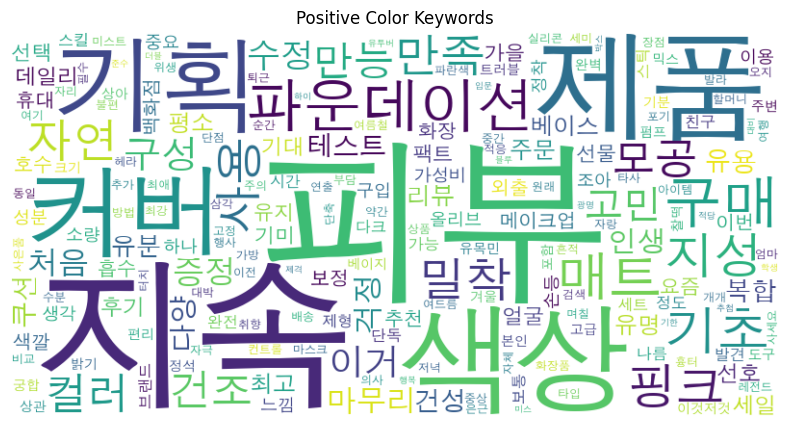

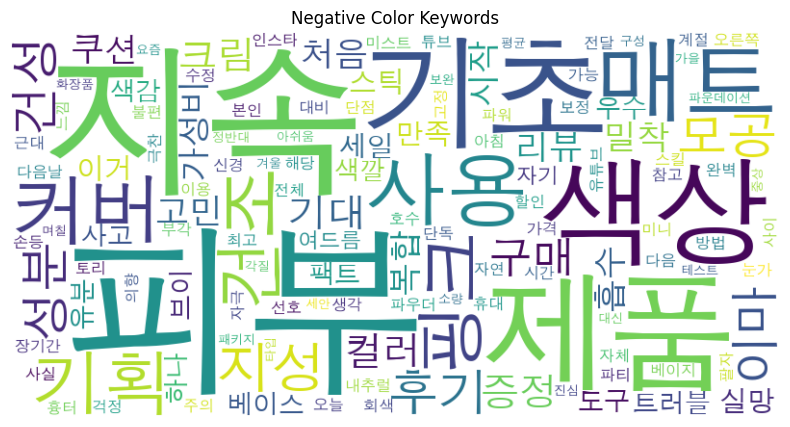

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(word_freq, title):
    wc = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf', width=800, height=400, background_color='white')
    wc.generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

plot_wordcloud(color_positive_words, "Positive Color Keywords")
plot_wordcloud(color_negative_words, "Negative Color Keywords")

In [15]:
import pandas as pd

# dict ‚ûù dataframe Î≥ÄÌôò
df_color_pos = pd.DataFrame(color_positive_words.items(), columns=["keyword", "positive_count"])
df_color_neg = pd.DataFrame(color_negative_words.items(), columns=["keyword", "negative_count"])

# merge: Î™®Îì† ÌÇ§ÏõåÎìúÏóê ÎåÄÌï¥ ÏñëÏ™Ω count ÌëúÏãú
df_color_summary = pd.merge(df_color_pos, df_color_neg, on='keyword', how='outer').fillna(0)

# Ï†ïÏàòÌòï Î≥ÄÌôò
df_color_summary['positive_count'] = df_color_summary['positive_count'].astype(int)
df_color_summary['negative_count'] = df_color_summary['negative_count'].astype(int)

# Ï¥ùÌï© Í∏∞Ï§Ä Ï†ïÎ†¨
df_color_summary['total'] = df_color_summary['positive_count'] + df_color_summary['negative_count']
df_color_summary = df_color_summary.sort_values(by='total', ascending=False)

df_color_summary.head()

keyword  positive_count  negative_count  total
372      ÌîºÎ∂Ä             236              31    267
310      ÏßÄÏÜç             193              24    217
151      ÏÉâÏÉÅ              95              12    107
291      Ï†úÌíà              92              14    106
46       Í∏∞Ìöç              70               7     77

In [16]:
def get_color_keywords_for_row(text, tokenizer, model, top_k=3):
    text_cleaned = clean(text)
    noun_candidates = extract_nouns(text_cleaned)
    if not noun_candidates:
        return []
    
    keywords = extract_top_color_keywords(text_cleaned, tokenizer, model, noun_candidates, top_k=top_k)
    return keywords if keywords else []

# ÏÉà Ïª¨Îüº Ï∂îÍ∞Ä: Î¶¨Î∑∞Î≥Ñ ÏÉâÏÉÅ ÌÇ§ÏõåÎìú top-k Î¶¨Ïä§Ìä∏
df['color_keyword'] = df['review'].apply(lambda x: get_color_keywords_for_row(x, tokenizer, model, top_k=3))

# Í≤∞Í≥º ÌÖåÏù¥Î∏î Íµ¨ÏÑ±
df_keyword_table = df[['review', 'label', 'color_keyword']]
df_keyword_table.head()

review  label  color_keyword
0  Î∞îÎ°ú ÌååÎç∞ÌïòÍ≥† Ï∞çÏùÄ ÏÇ¨ÏßÑ 15ÏãúÍ∞Ñ ÌõÑ ÏÇ¨ÏßÑÏ≤´ ÌååÎç∞Î•º Ïù¥Í±∏Î°ú ÏçºÎäîÎç∞ Îã§Î•∏ Í±∞ ÎèÑÏ†Ñ Ïïà...      1   [Î™®Í≥µ, Î≥µÌï©, ÌùâÌÑ∞]
1  ÏöîÍ±¥ Í∑∏ÎÉ• Î¨¥ÎÇúÎ¨¥ÎÇú ÏõêÎûòÎäî Î≥ÑÎ£®ÏòÄÎäîÎç∞ Ïó¨Î¶ÑÏù¥Îùº Í∑∏Îü∞ÏßÄ ÏµúÍ≥†Ïùò ÌååÎç∞ÏûÑ ÏõåÌÑ∞Î£®ÌîÑÎèÑ ÏïÑÎãå...      1           [ÏõêÎûò]
2        Ïª§Î≤ÑÎ†•ÏùÄ ÏûàÏúºÎ©¥ÏÑúÎèÑ Î∞ÄÏ∞©Î†•ÏûàÍ≤å Î∞úÎ¶¨ÎäîÍ±∞ Í∞ôÏïÑÏöî ÏÉâÎèÑ Ïù¥ÎªêÏÑú ÎßàÏùåÏóê Îì§Ïñ¥Ïöî !!      1       [Î∞ÄÏ∞©, Ïª§Î≤Ñ]
3  Î™áÎÖÑÏß∏ ÏÇ¨Ïö©Ï§ëÏù∏ Ï†úÌíàÏù¥ÏóêÏöî„ÖéÌååÏö¥Îç∞Ïù¥ÏÖò Ï§ëÏóê ÎÅàÏ†ÅÏù¥ÏßÄÏïäÍ≥† Î∞úÏÉâÎèÑ Ï¢ãÏïÑÏöîÌïòÎÇò Îçî ÏüÅÏó¨ ...      1   [Ï†úÌíà, Íµ¨Îß§, ÏÇ¨Ïö©]
4  1Î∞îÎ•¥Í∏∞Ï†Ñ 2Î≤à Î∞îÎ•∏ ÌõÑÏ°∞Í∏àÎßå Î∞úÎûêÎäîÎç∞ÎèÑ Î∞ùÏïÑÏßÑÍ≤å Ìôï ÎäêÍª¥Ï†∏ÏöîÍ∑ºÎç∞ Ï≤òÏùåÏóê Î∞úÎûêÏùÑÎïê ...      0  [Í≥†Ï†ï, ÏßÄÏÜç, ÌååÏö∞Îçî]

In [17]:
df_keyword_table.to_csv("color_keywords_by_review.csv", index=False)